## Digital Health & Human Behaviour Project

### Loading the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("sleepdata (1).csv", sep =';')
data2 = pd.read_csv("sleepdata_2 (1).csv", sep=';')

print("dataset 1", data.shape)
print(data)

print("dataset 2", data2.shape)
print(data2)

print("dataset 1 columns:", data.columns)
print("dataset 2 columns", data2.columns)

dataset 1 (887, 8)
                   Start                  End Sleep quality Time in bed  \
0    2014-12-29 22:57:49  2014-12-30 07:30:13          100%        8:32   
1    2014-12-30 21:17:50  2014-12-30 21:33:54            3%        0:16   
2    2014-12-30 22:42:49  2014-12-31 07:13:31           98%        8:30   
3    2014-12-31 22:31:01  2015-01-01 06:03:01           65%        7:32   
4    2015-01-01 22:12:10  2015-01-02 04:56:35           72%        6:44   
..                   ...                  ...           ...         ...   
882  2018-02-12 21:54:14  2018-02-13 07:02:15           91%        9:08   
883  2018-02-13 23:49:19  2018-02-14 07:00:53           81%        7:11   
884  2018-02-14 21:24:05  2018-02-15 06:20:52           71%        8:56   
885  2018-02-15 21:36:32  2018-02-16 06:50:31           80%        9:13   
886  2018-02-16 22:52:29  2018-02-17 07:48:04           91%        8:55   

    Wake up             Sleep Notes  Heart rate  Activity (steps)  
0        :) 

### Pre processing
Checking the dataset: if it has any missing values, duplicates, type of the data, summary of the data

In [3]:
data2.dtypes

Start                           object
End                             object
Sleep Quality                   object
Regularity                      object
Mood                           float64
Heart rate (bpm)                 int64
Steps                            int64
Alarm mode                      object
Air Pressure (Pa)              float64
City                            object
Movements per hour             float64
Time in bed (seconds)          float64
Time asleep (seconds)          float64
Time before sleep (seconds)    float64
Window start                    object
Window stop                     object
Did snore                         bool
Snore time                     float64
Weather temperature (°C)       float64
Weather type                    object
Notes                           object
dtype: object

In [4]:
data2.describe()

,Mood,Heart rate (bpm),Steps,Air Pressure (Pa),Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Snore time,Weather temperature (°C)
count,0.0,921.0,921.000000,492.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,NaN,0.0,5311.599349,68.660163,174.277416,27505.497611,23912.683170,1001.556135,312.944300,2.142562
std,NaN,0.0,4396.822762,41.845368,822.776299,3916.696288,4066.189356,1046.287777,455.472848,6.324558
min,NaN,0.0,0.000000,0.000000,0.000000,1852.800000,0.000000,0.000000,0.000000,-19.000000
25%,NaN,0.0,2299.000000,0.000000,37.000000,25500.600000,21627.500000,449.900000,0.000000,0.000000
50%,NaN,0.0,4245.000000,93.700000,49.600000,27422.900000,23919.000000,563.700000,148.000000,0.000000
75%,NaN,0.0,7452.000000,94.400000,65.200000,29530.100000,26257.000000,1287.000000,440.000000,3.100000
max,NaN,0.0,38165.000000,96.500000,17926.700000,46703.400000,45769.400000,5677.700000,4477.300000,24.500000


In [5]:
data2.isnull().sum()

Start                            0
End                              0
Sleep Quality                    0
Regularity                       0
Mood                           921
Heart rate (bpm)                 0
Steps                            0
Alarm mode                       0
Air Pressure (Pa)              429
City                           434
Movements per hour               0
Time in bed (seconds)            0
Time asleep (seconds)            0
Time before sleep (seconds)      0
Window start                    80
Window stop                     80
Did snore                        0
Snore time                       0
Weather temperature (°C)         0
Weather type                     0
Notes                          912
dtype: int64

In [66]:
data.isnull().sum()

Start                 0
End                   0
Sleep quality         0
Time in bed           0
Wake up             641
Sleep Notes         235
Heart rate          725
Activity (steps)      0
dtype: int64

Since most interesting columns in dataset1 "data" is missing (heart rate, notes), we continue using dataset2. dataset 2 also has more features

In [6]:
duplicates = data2[data2.duplicated()]
print("Number of duplications:", len(duplicates))

Number of duplications: 0


Since heart rate had only 0 values from the print data, it is removed
mood, airpressure, city notes removed as it contains too many missing values. interpolating it from existing data would give bais results.
window start, window stop are similar to Start and End columns, hence they're dropped too

In [7]:
df = data2.drop(["Notes", "Window start", "Window stop", "Heart rate (bpm)", "Air Pressure (Pa)", "City", "Mood"], axis=1)
print(df.isnull().sum())
print(df.shape)
print(data2.shape)

Start                          0
End                            0
Sleep Quality                  0
Regularity                     0
Steps                          0
Alarm mode                     0
Movements per hour             0
Time in bed (seconds)          0
Time asleep (seconds)          0
Time before sleep (seconds)    0
Did snore                      0
Snore time                     0
Weather temperature (°C)       0
Weather type                   0
dtype: int64
(921, 14)
(921, 21)


In [8]:
df.describe()

,Steps,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Snore time,Weather temperature (°C)
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,5311.599349,174.277416,27505.497611,23912.683170,1001.556135,312.944300,2.142562
std,4396.822762,822.776299,3916.696288,4066.189356,1046.287777,455.472848,6.324558
min,0.000000,0.000000,1852.800000,0.000000,0.000000,0.000000,-19.000000
25%,2299.000000,37.000000,25500.600000,21627.500000,449.900000,0.000000,0.000000
50%,4245.000000,49.600000,27422.900000,23919.000000,563.700000,148.000000,0.000000
75%,7452.000000,65.200000,29530.100000,26257.000000,1287.000000,440.000000,3.100000
max,38165.000000,17926.700000,46703.400000,45769.400000,5677.700000,4477.300000,24.500000


In [13]:
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])


Next we fix some of the data that has text format to use them later in the ML model.

### Taking care of non numerical columns

In [14]:
df["Sleep Quality"] = df["Sleep Quality"].astype(str)
df["Regularity"] = df["Regularity"].astype(str)

In [15]:
df["Sleep Quality"] = pd.to_numeric(df["Sleep Quality"].str.replace("%",""), errors="coerce").astype("int64")
df["Regularity"] = pd.to_numeric(df["Regularity"].str.replace("%",""), errors="coerce").astype("int64")


In [16]:
print(df["Alarm mode"].unique())
print(df.dtypes)
df["Weekday"] = df["End"].dt.day_name()


['Normal' 'No alarm']
Start                          datetime64[ns]
End                            datetime64[ns]
Sleep Quality                           int64
Regularity                              int64
Steps                                   int64
Alarm mode                             object
Movements per hour                    float64
Time in bed (seconds)                 float64
Time asleep (seconds)                 float64
Time before sleep (seconds)           float64
Did snore                                bool
Snore time                            float64
Weather temperature (°C)              float64
Weather type                           object
dtype: object


In [17]:
print(df)

                  Start                 End  Sleep Quality  Regularity  Steps  \
0   2019-05-12 23:26:13 2019-05-13 06:11:03             60           0   8350   
1   2019-05-13 22:10:31 2019-05-14 06:10:42             73           0   4746   
2   2019-05-14 21:43:00 2019-05-15 06:10:41             86          96   4007   
3   2019-05-15 23:11:51 2019-05-16 06:13:59             77          92   6578   
4   2019-05-16 23:12:13 2019-05-17 06:20:32             78          94   4913   
..                  ...                 ...            ...         ...    ...   
916 2022-03-24 21:33:46 2022-03-25 04:21:40             71          77   3903   
917 2022-03-25 16:48:05 2022-03-25 17:30:22              9          14    495   
918 2022-03-26 21:14:23 2022-03-27 06:11:01             49          -1  13388   
919 2022-03-28 22:53:23 2022-03-29 04:50:36             77          22    456   
920 2022-03-29 22:44:09 2022-03-30 05:11:15             68          85   5156   

    Alarm mode  Movements p

Next, we convert the strings to integers

In [19]:
df["Alarm mode"]=df["Alarm mode"].replace("Normal", 0)


In [20]:
df["Alarm mode"]=df["Alarm mode"].replace("No alarm", 1)

/tmp/ipykernel_283/1673223155.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Alarm mode"]=df["Alarm mode"].replace("No alarm", 1)


In [21]:
print(df["Alarm mode"].unique())

[0 1]


Here we check if the data is balanced for the snore column. Unofortunately it is not. So snore would not be a good predictor variable

In [22]:
# Count the number of unique values in the "Did snore" column
snore_counts = df["Did snore"].value_counts()

# Print the result
print(snore_counts)


Did snore
True     913
False      8
Name: count, dtype: int64


In [23]:
print(df["Weather type"].unique())
weather_counts = df["Weather type"].value_counts()

# Print the result
print(weather_counts)

['No weather' 'Sunny' 'Fair' 'Partly cloudy' 'Cloudy' 'Snow' 'Fog' 'Rain'
 'Rainy showers']
Weather type
No weather       488
Sunny            121
Cloudy            75
Partly cloudy     71
Fog               59
Rain              37
Fair              35
Snow              31
Rainy showers      4
Name: count, dtype: int64


In [25]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Weather type']= label_encoder.fit_transform(df['Weather type']) 
  
df['Weather type'].unique() 

array([3, 8, 1, 4, 0, 7, 2, 5, 6])

In [26]:
df['Did snore'] = label_encoder.fit_transform(df['Did snore'])
print(df['Did snore'].unique())
print(df['Regularity'].unique())

[1 0]
[  0  96  92  94  80  58  77  98  95  83  73  82  86  91  89  88  93  90
  85  84  81  87  97  74  78  67  68  71  76  66  72  63  79  70  50  59
  75  99  47  54  65  45  57 100  62  41  23  14  -1  22]


### Data visualization

In [28]:
# Create boxplots for numerical columns
import matplotlib.pyplot as plt

numerical_columns = df.select_dtypes(include=['number']).columns.to_list()
numerical_columns


['Sleep Quality',
 'Regularity',
 'Steps',
 'Alarm mode',
 'Movements per hour',
 'Time in bed (seconds)',
 'Time asleep (seconds)',
 'Time before sleep (seconds)',
 'Did snore',
 'Snore time',
 'Weather temperature (°C)',
 'Weather type']

### Correlations

Text(0.5, 1.0, 'Correlation')

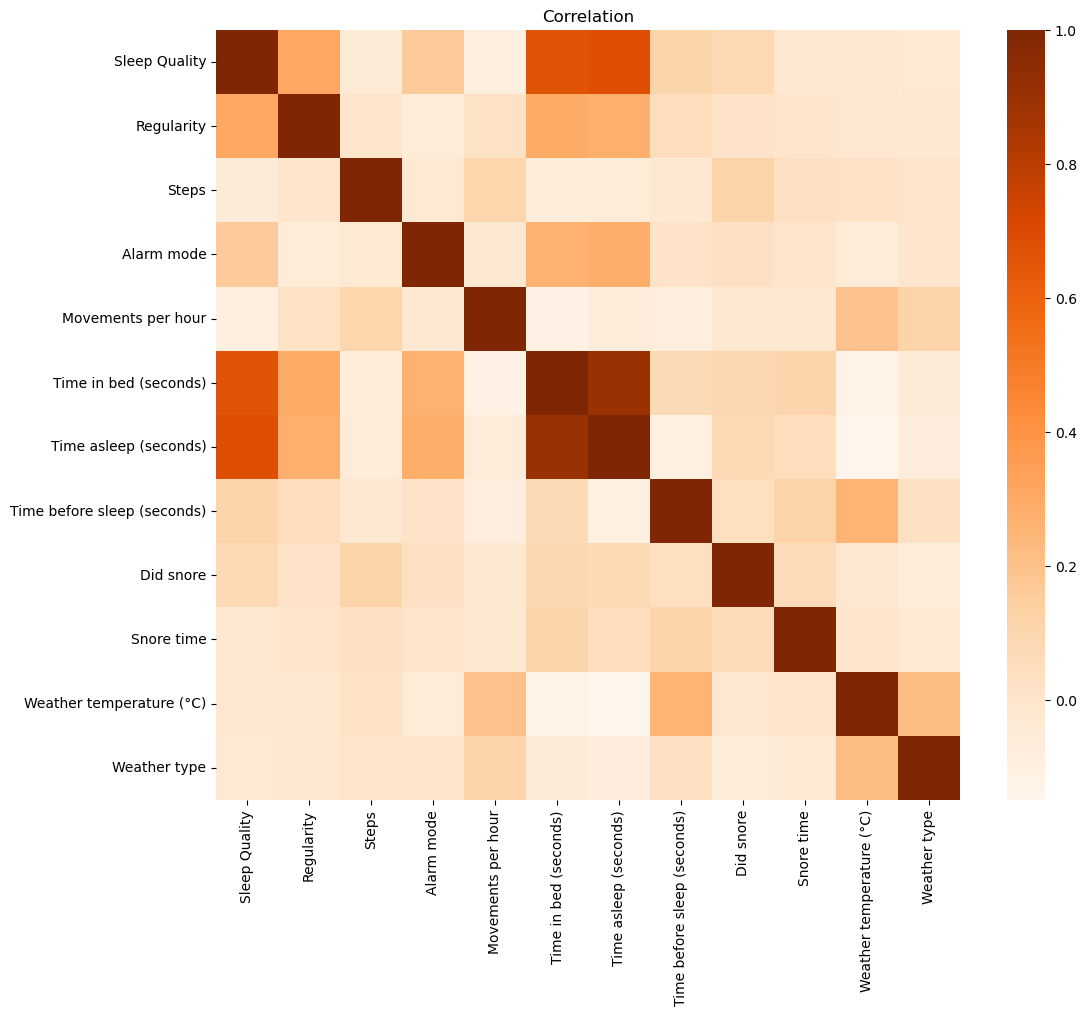

In [29]:
fig = plt.figure(figsize = (12,10))
r = sns.heatmap(df[numerical_columns].corr(),cmap='Oranges')
r.set_title('Correlation')

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Save the plot as a PNG file
file_path = 'correlation_heatmap.png'  # Specify your desired file path
fig.savefig(file_path)


Let's check the range for each columns to look for outliers

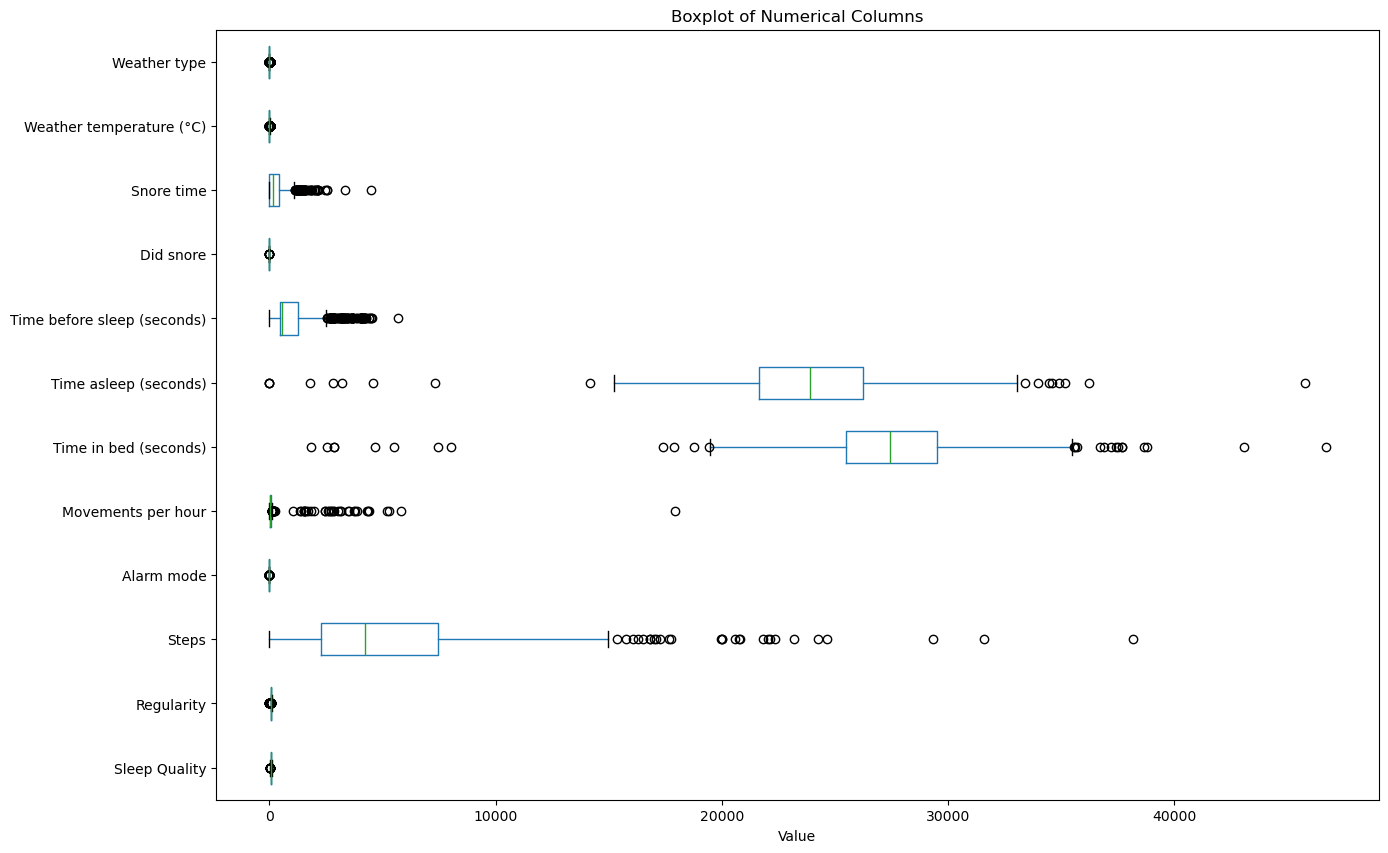

In [31]:
fig2 = plt.figure(figsize=(15, 10))
df.boxplot(column=numerical_columns, grid=False, vert=False)
plt.title("Boxplot of Numerical Columns")
plt.xlabel("Value")
plt.show()

file_path = 'boxplot.png'  # Specify your desired file path
fig2.savefig(file_path)

We see that there are many outliers and the range varies quite a lot between the columns, so we will use standard scaler later in the code

### Sleep quality vs time in bed

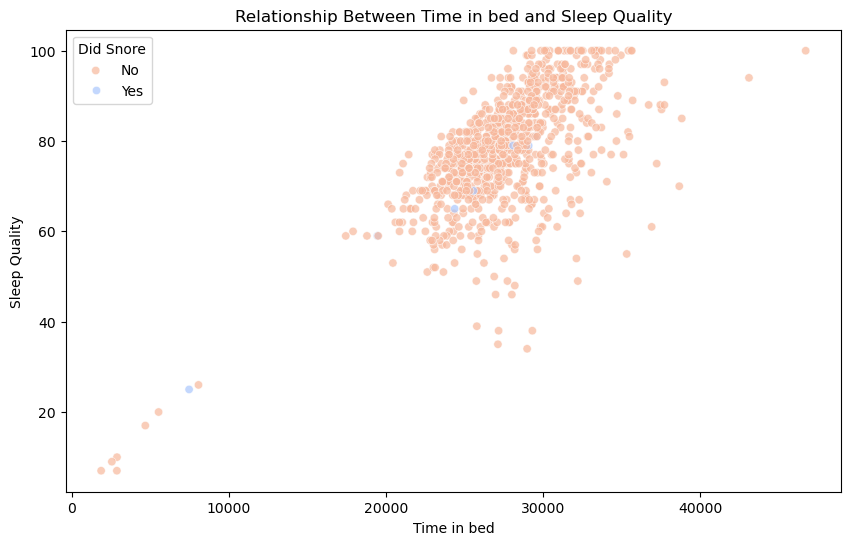

In [32]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Time in bed (seconds)', y="Sleep Quality", hue="Did snore", palette="coolwarm", alpha=0.7)
plt.title("Relationship Between Time in bed and Sleep Quality")
plt.xlabel("Time in bed")
plt.ylabel("Sleep Quality")
plt.legend(title="Did Snore", labels=["No", "Yes"])
plt.show()


### Physical Activity vs. Sleep Quality
This plot explores whether an increase in steps leads to better sleep quality.

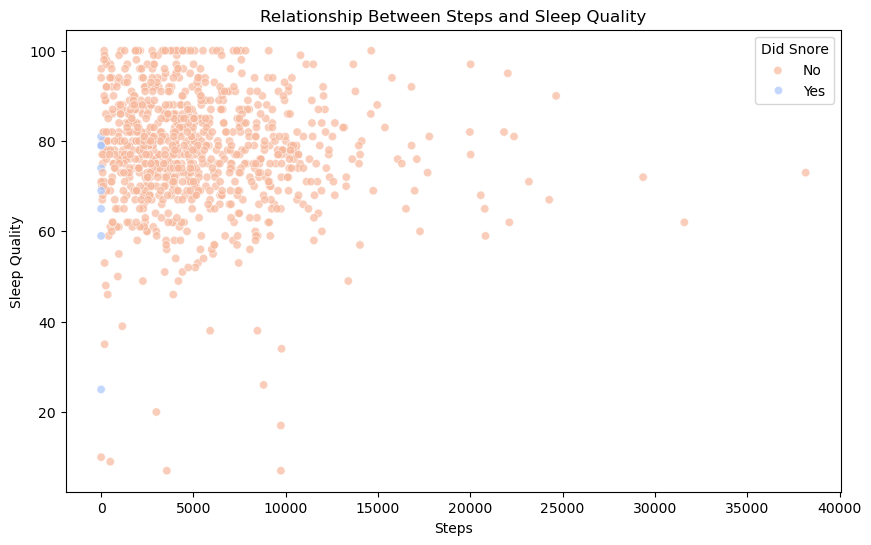

In [33]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Steps", y="Sleep Quality", hue="Did snore", palette="coolwarm", alpha=0.7)
plt.title("Relationship Between Steps and Sleep Quality")
plt.xlabel("Steps")
plt.ylabel("Sleep Quality")
plt.legend(title="Did Snore", labels=["No", "Yes"])
plt.show()


###  Time in Bed by Snoring Status
Analyzing whether snoring behavior affects the amount of time spent in bed.

/tmp/ipykernel_283/1432181502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Did snore", y="Time in bed (seconds)", palette="Set2")
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/software/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/software/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1

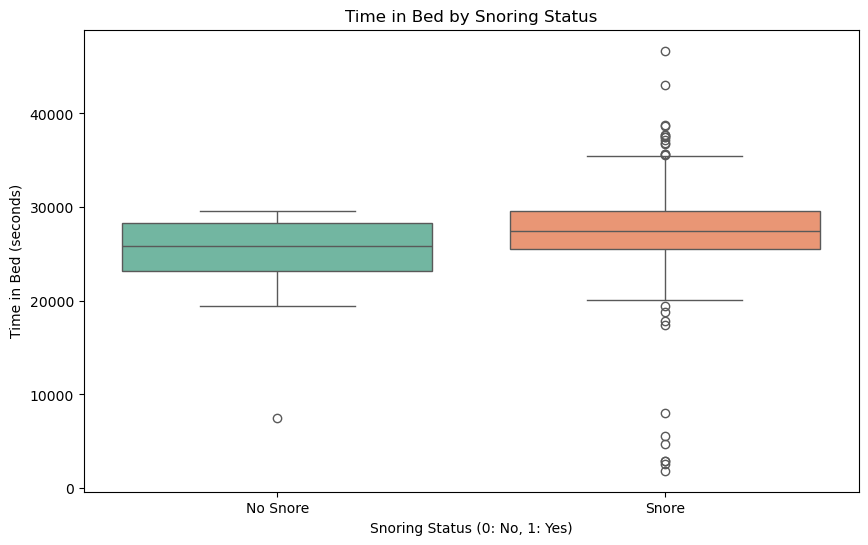

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Did snore", y="Time in bed (seconds)", palette="Set2")
plt.title("Time in Bed by Snoring Status")
plt.xlabel("Snoring Status (0: No, 1: Yes)")
plt.ylabel("Time in Bed (seconds)")
plt.xticks([0, 1], labels=["No Snore", "Snore"])
plt.show()


 ### Sleep Quality by Weather Temperature
 Examining how different weather conditions impact sleep quality.

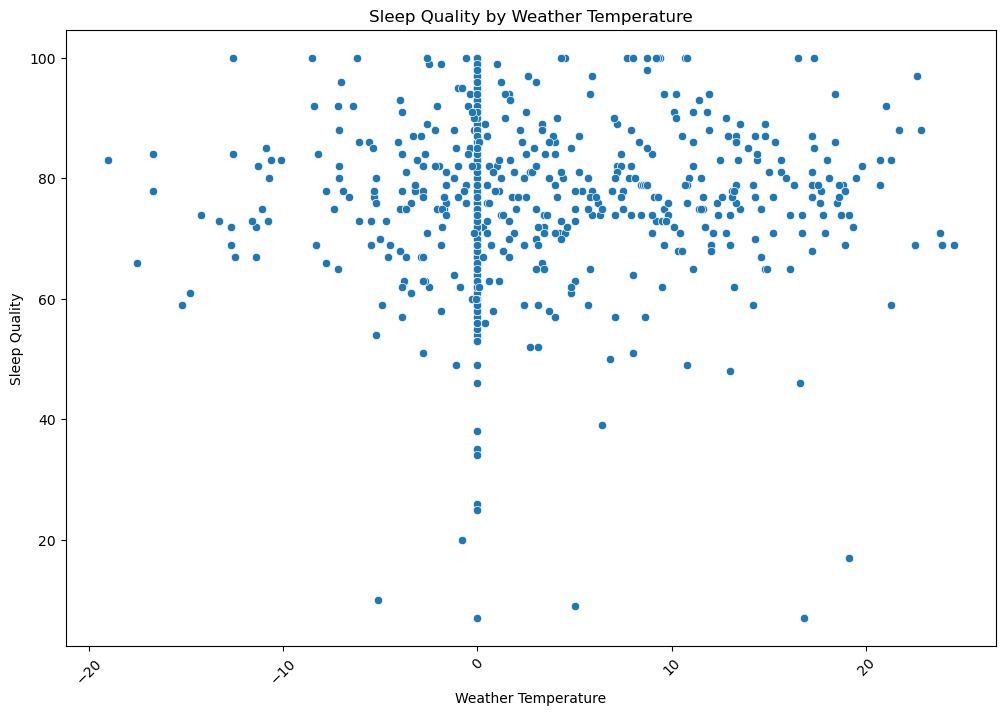

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x="Weather temperature (°C)", y="Sleep Quality")
plt.title("Sleep Quality by Weather Temperature")
plt.xlabel("Weather Temperature")
plt.ylabel("Sleep Quality")
plt.xticks(rotation=45)
plt.show()


### Preparing data for ML models.

We start by scaling the data since the columns have different ranges

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Scale the numerical columns
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the scaled numerical columns
df_scaled[numerical_columns].head()


,Sleep Quality,Regularity,Steps,Alarm mode,Movements per hour,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Did snore,Snore time,Weather temperature (°C),Weather type
0,0.569892,0.009901,0.218787,0.0,0.001952,0.500247,0.502384,0.028515,1.0,0.020548,0.436782,0.375
1,0.709677,0.009901,0.124355,0.0,0.004385,0.601049,0.549732,0.033834,1.0,0.000000,0.436782,0.375
2,0.849462,0.960396,0.104991,0.0,0.003375,0.637867,0.621175,0.035772,1.0,0.016528,0.436782,0.375
3,0.752688,0.920792,0.172357,0.0,0.002521,0.523400,0.505414,0.029748,1.0,0.000000,0.436782,0.375
4,0.763441,0.940594,0.128731,0.0,0.002488,0.531667,0.494099,0.030171,1.0,0.041990,0.436782,0.375


## PCA

We do PCA here to see how the variance is explained by different features.
However the PCA features are not used in the ML models, as when PCA is done on data, they lose their original meaning.
So it has been commented out, so the graph is empty here.
#### If interested uncomment the code from pca.fit. however, note that doing so will change the later ML models.

In [42]:
from sklearn.decomposition import PCA

# Step 1: Apply PCA
pca = PCA()
#pca.fit(scaled_data)

# Explained variance ratio
#explained_variance_ratio = pca.explained_variance_ratio_
#cumulative_variance = explained_variance_ratio.cumsum()

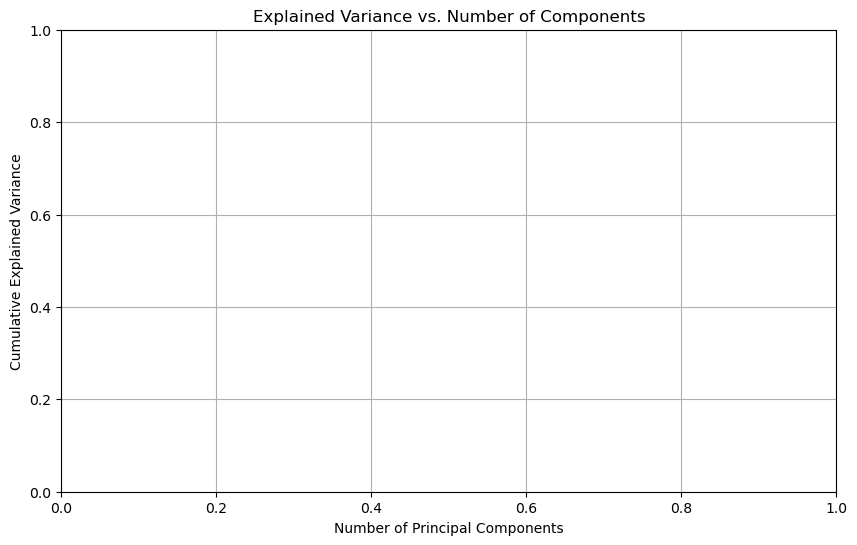

In [43]:
# Plot explained variance
plt.figure(figsize=(10, 6))
#plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
#plt.show()


In [ ]:
# Step 3: Transform the data
pca = PCA(n_components=8)
principal_components = pca.fit_transform(scaled_data)

### ML Models: Kmeans

In [44]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Step 1: K-Means Clustering
df_data = df_scaled[numerical_columns]

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans_labels = kmeans.fit_predict(df_data)


/opt/software/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


We use PCA to show the clusters of k means

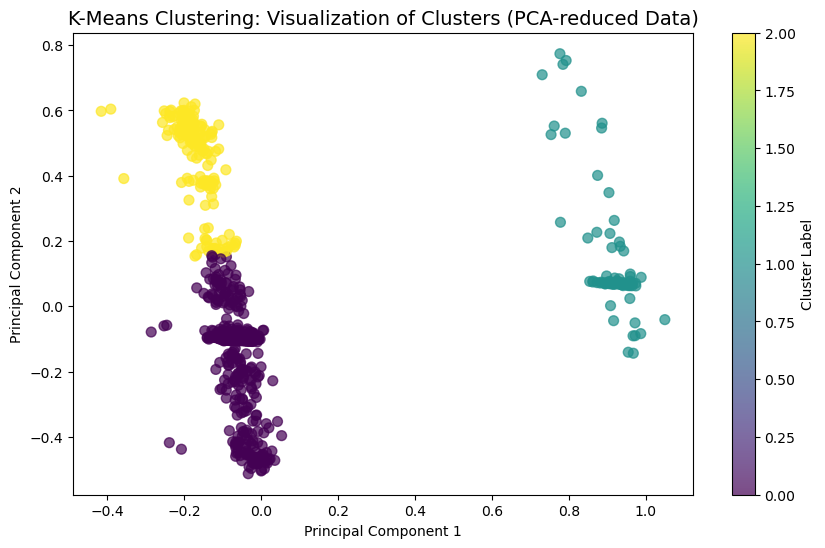

In [46]:
# Step 2: Reduce dimensionality for visualization (using PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_data)

# Step 3: Plot the clusters in 2D using PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering: Visualization of Clusters (PCA-reduced Data)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [47]:
# Silhouette Scores (optional)
kmeans_silhouette = silhouette_score(df_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette}")

K-Means Silhouette Score: 0.398972969009269


Let's to find how each clusters have been defined

In [48]:
import pandas as pd
import numpy as np

# Step 1: Add the cluster labels to the original data
df_scaled['Cluster'] = kmeans_labels

# Step 2: Calculate the mean (or median) of each feature for each cluster
cluster_means = df_scaled.groupby('Cluster')[numerical_columns].mean()

# Step 3: Optionally, use statistical tests (e.g., ANOVA or t-test) to compare features between clusters
from scipy.stats import f_oneway

# Create a dictionary to store the p-values for each feature
p_values = {}
for feature in numerical_columns:
    # Perform one-way ANOVA for each feature
    cluster_data = [df_scaled[df_scaled['Cluster'] == cluster][feature] for cluster in np.unique(kmeans_labels)]
    _, p_value = f_oneway(*cluster_data)
    p_values[feature] = p_value

# Convert p-values to a DataFrame for easy viewing
p_values_df = pd.DataFrame(list(p_values.items()), columns=['Feature', 'P-value'])

# Step 4: Display results
print("Mean values for each cluster:")
print(cluster_means)

print("\nP-values for features (from ANOVA test):")
print(p_values_df.sort_values(by='P-value'))

# Step 5: Identify the most important features for each cluster based on mean values
# Optionally, look for large differences between the clusters' mean values


Mean values for each cluster:
         Sleep Quality  Regularity     Steps  Alarm mode  Movements per hour  \
Cluster                                                                        
0             0.759964    0.851828  0.139630         0.0            0.006874   
1             0.832527    0.824134  0.128353         1.0            0.006451   
2             0.739675    0.829714  0.142374         0.0            0.021967   

         Time in bed (seconds)  Time asleep (seconds)  \
Cluster                                                 
0                     0.568882               0.519961   
1                     0.647652               0.604797   
2                     0.549180               0.494476   

         Time before sleep (seconds)  Did snore  Snore time  \
Cluster                                                       
0                           0.163933   0.992481    0.069631   
1                           0.184386   1.000000    0.073230   
2                           0.2

/opt/software/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


### ML model: DB scan

In [49]:
# Step 2: DBSCAN Clustering
dbscan = DBSCAN(eps=0.9, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(df_data)


In [50]:
dbscan_silhouette = silhouette_score(df_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
if dbscan_silhouette is not None:
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN Silhouette Score not applicable (single cluster or noise).")

K-Means Silhouette Score: 0.398972969009269
DBSCAN Silhouette Score: 0.5110801791465537


In [51]:
df_data.columns

Index(['Sleep Quality', 'Regularity', 'Steps', 'Alarm mode',
       'Movements per hour', 'Time in bed (seconds)', 'Time asleep (seconds)',
       'Time before sleep (seconds)', 'Did snore', 'Snore time',
       'Weather temperature (°C)', 'Weather type'],
      dtype='object')

### ML model: SVR based on Sleep quality
sleep quality chosen as the dependent variable.

In [52]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = df_data.drop(columns=["Sleep Quality", "Time in bed (seconds)"])  # Features (all except 'Steps')
y = df_data["Sleep Quality"]  # Target variable ('Steps')

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the SVR model
svr = SVR(kernel='rbf', C=100, epsilon=0.1)  # You can tune the parameters here
svr.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = svr.predict(X_test)



In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 7: Calculate the metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")


R² Score: 0.3471
Mean Absolute Error (MAE): 0.0744
Mean Squared Error (MSE): 0.0116


### Random forest for sleep quality

Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.05
R² Score: 0.75


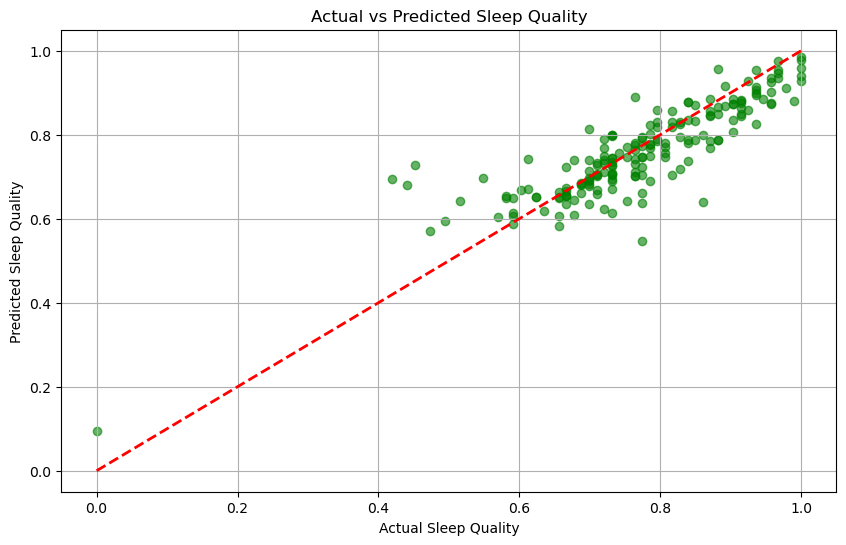

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Step 3: Train the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
random_forest.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = random_forest.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 6: Visualization of Predictions vs. Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.title("Actual vs Predicted Sleep Quality")
plt.xlabel("Actual Sleep Quality")
plt.ylabel("Predicted Sleep Quality")
plt.grid(True)
plt.show()


Figuring out which features has the most improtance in predicting the outcome

                       Feature  Importance
4        Time asleep (seconds)    0.502245
3           Movements per hour    0.282716
5  Time before sleep (seconds)    0.089963
0                   Regularity    0.032674
1                        Steps    0.027778
7                   Snore time    0.025225
8     Weather temperature (°C)    0.024654
9                 Weather type    0.013401
2                   Alarm mode    0.000911
6                    Did snore    0.000433


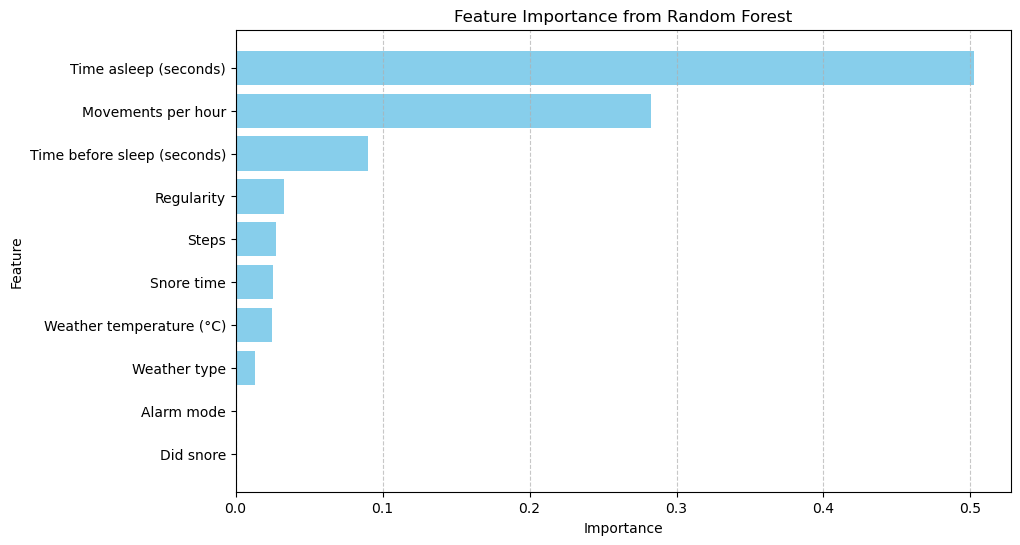

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get feature importance from the trained Random Forest model
feature_importances = random_forest.feature_importances_

# Step 2: Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Print the feature importance
print(importance_df)

# Step 4: Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### ML model: linear regression

R2 Score: 0.48
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01


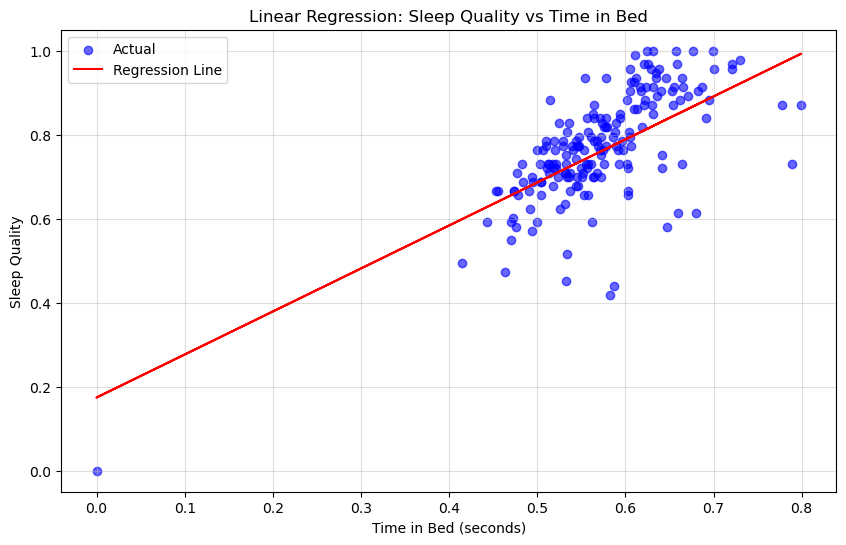

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X = df_data[["Time in bed (seconds)"]].values  # Predictor
y = df_data["Sleep Quality"].values  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = linear_regressor.predict(X_test)

# Step 5: Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Step 6: Print results
print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Step 7: Visualize the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", alpha=0.6, label="Actual")
plt.plot(X_test, y_pred, color="red", label="Regression Line")
plt.xlabel("Time in Bed (seconds)")
plt.ylabel("Sleep Quality")
plt.title("Linear Regression: Sleep Quality vs Time in Bed")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


### Robustness check

Next I try to remove some outliers from the data and try to fit the mdoel again.
Since random forest had the best results, i use only random forest with this new data

In [58]:
# Define columns to check for outliers
columns_to_check = ["Time asleep (seconds)", "Steps"]

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 1st Quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # 3rd Quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to remove outliers
df_filtered = remove_outliers_iqr(df_data, columns_to_check)

# Print the shapes of original and filtered dataframes
print(f"Original dataset size: {df_data.shape}")
print(f"Filtered dataset size: {df_filtered.shape}")


Original dataset size: (921, 12)
Filtered dataset size: (876, 12)


Mean Squared Error (MSE): 0.00443
Mean Absolute Error (MAE): 0.05
R² Score: 0.72


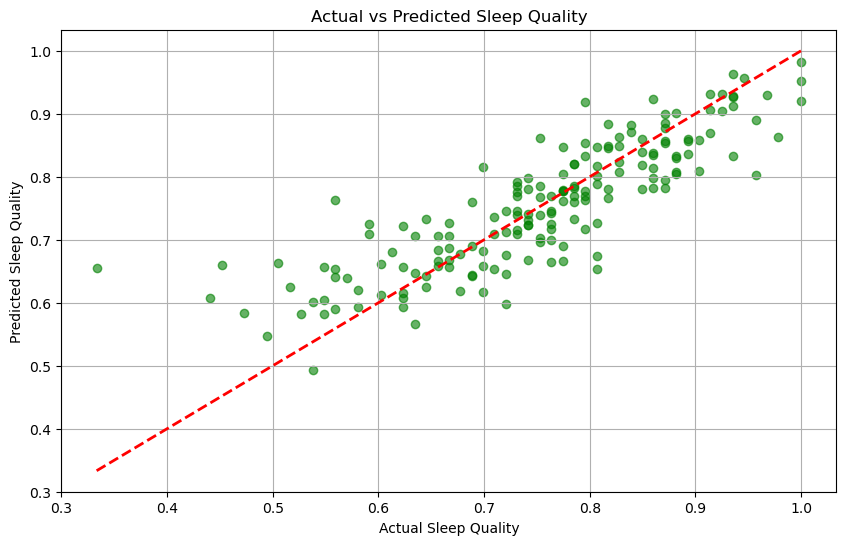

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Step 1: Prepare the data
X = df_filtered.drop(columns=["Sleep Quality", "Time in bed (seconds)"])  # Features (all except 'Steps')
y = df_filtered["Sleep Quality"]  # Target variable ('Steps')

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest
random_forest.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = random_forest.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 6: Visualization of Predictions vs. Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.title("Actual vs Predicted Sleep Quality")
plt.xlabel("Actual Sleep Quality")
plt.ylabel("Predicted Sleep Quality")
plt.grid(True)
plt.show()


Checking the feature importance for this new model

### final model from tensdor flow

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Prepare the data
X = df_data.drop(columns=["Sleep Quality"]).values  # Feature(s)
y = df_data["Sleep Quality"].values  # Target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN input (samples, timesteps, features)
X_scaled = np.expand_dims(X_scaled, axis=-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential([
    Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Set: {mae:.2f}")

# Predictions
y_pred = model.predict(X_test)

# Metrics
from sklearn.metrics import r2_score, mean_squared_error

print("Performance Metrics:")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")


2024-12-11 01:25:19.501180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
37/37 [==============================] - 1s 11ms/step - loss: 0.2832 - mae: 0.4067 - val_loss: 0.0798 - val_mae: 0.2117
Epoch 2/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0591 - mae: 0.1908 - val_loss: 0.0419 - val_mae: 0.1608
Epoch 3/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0357 - mae: 0.1517 - val_loss: 0.0318 - val_mae: 0.1356
Epoch 4/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0253 - mae: 0.1255 - val_loss: 0.0239 - val_mae: 0.1162
Epoch 5/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0184 - mae: 0.1084 - val_loss: 0.0221 - val_mae: 0.1106
Epoch 6/20
37/37 [==============================] - 0s 5ms/step - loss: 0.0153 - mae: 0.0979 - val_loss: 0.0200 - val_mae: 0.1051
Epoch 7/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0136 - mae: 0.0926 - val_loss: 0.0189 - val_mae: 0.1014
Epoch 8/20
37/37 [==============================] - 0s 4ms/step - loss: 0.0123 - mae: 0.0

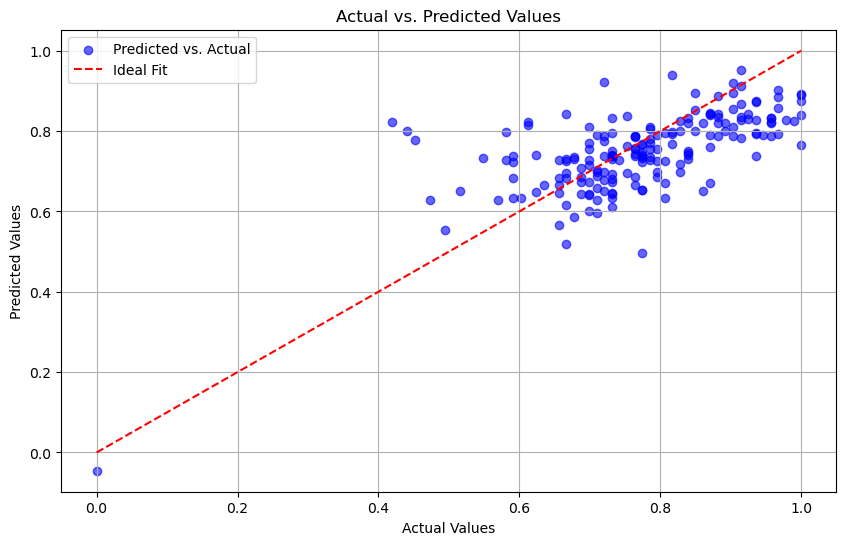

In [63]:
import numpy as np

# Predictions (flatten if necessary)
y_pred_flat = y_pred.flatten() if len(y_pred.shape) > 1 else y_pred

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_flat, alpha=0.6, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()


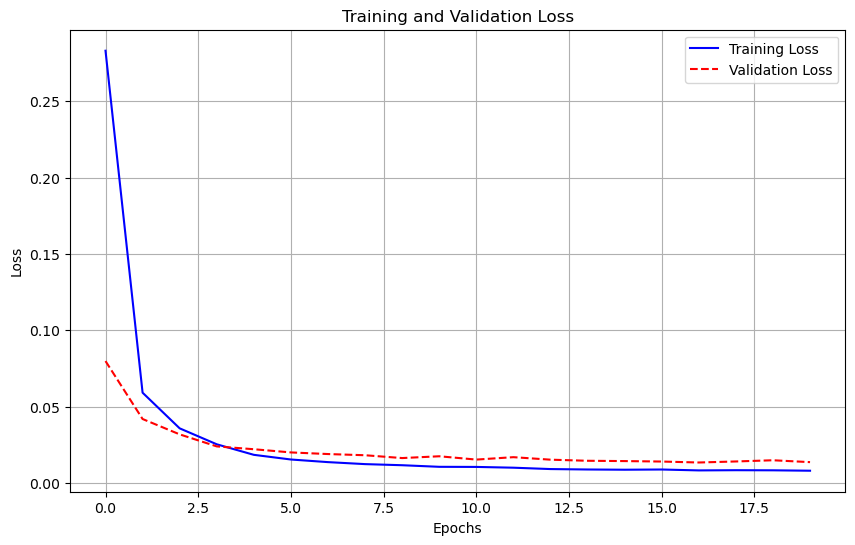

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='--')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()